<h1 align="center"> Introduction to Statistics with Python </h1>




In [1]:
%reset -f
#import pandas_datareader as pd_data
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import seaborn as sns
import math as m
import scipy as sp
from statsmodels.stats.anova import anova_lm

In [2]:
# Will fix figure size for this notebook
plt.rcParams["figure.figsize"] = (8,6)

Example of Non-Linear Regression
===


In [61]:
df = pd.read_csv('strips_dec95.txt')
df.head()

,T price
0,0.1260 99.3930
1,0.6219 96.9240
2,1.1260 94.5110
3,1.6219 92.0700
4,2.1260 89.6440


In [64]:
df = pd.read_csv('strips_dec95.txt', sep=" ")
df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,T,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,price
0,NaN,NaN,NaN,NaN,0.1260,NaN,NaN,99.393,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,0.6219,NaN,NaN,96.924,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,1.1260,NaN,NaN,94.511,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,1.6219,NaN,NaN,92.070,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,2.1260,NaN,NaN,89.644,NaN,NaN,NaN


In [68]:
len(df)

117

In [69]:
df

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,T,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,price
0,NaN,NaN,NaN,NaN,0.1260,NaN,NaN,99.393,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,0.6219,NaN,NaN,96.924,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,1.1260,NaN,NaN,94.511,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,1.6219,NaN,NaN,92.070,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,2.1260,NaN,NaN,89.644,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,2.6219,NaN,NaN,87.295,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,3.1260,NaN,NaN,84.949,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,3.6219,NaN,NaN,82.698,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,4.1260,NaN,NaN,80.427,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,4.6219,NaN,NaN,78.293,NaN,NaN,NaN


In [71]:
df = pd.read_csv('strips_dec95.csv')
df.head()

,T,price
0,0.1260,99.393
1,0.6219,96.924
2,1.1260,94.511
3,1.6219,92.070
4,2.1260,89.644


In [72]:
df.shape

(117, 2)

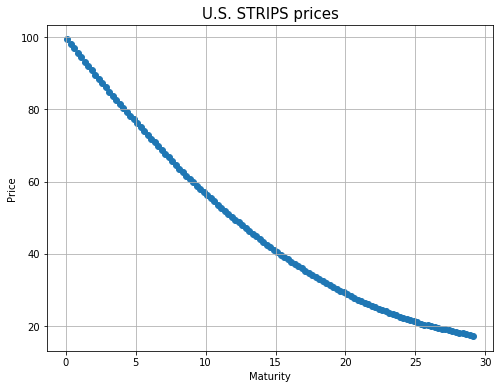

In [73]:
plt.scatter(df['T'],df['price'])
plt.ylabel('Price')
plt.xlabel('Maturity')
plt.title('U.S. STRIPS prices', fontsize = 15)
plt.grid()
plt.savefig("US_STRIPS_PRICES")

In [74]:

def getEmpiricalFwrdRate(mat,price):
    n = len(mat)
    temp = np.zeros(n-1)
    for i in range(0,n-1):
        dt = mat[i+1]-mat[i]
        temp[i] = - np.log(price[i+1]/price[i])/dt  
    len(temp)
    return temp



In [75]:
rt = getEmpiricalFwrdRate(df['T'],df['price'])
mat = df['T'].iloc[1:] #why is this necessary?

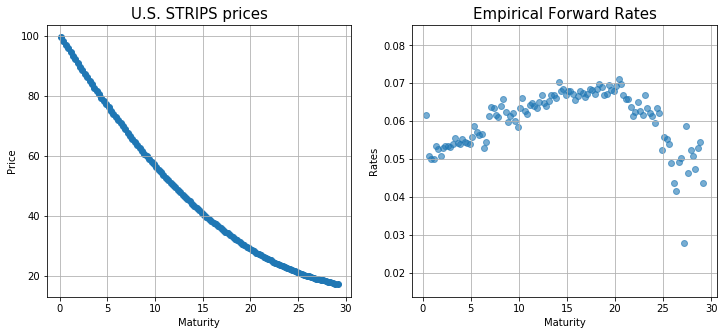

In [76]:
plt.figure(figsize=(12,5))
plt.subplot(1,2, 1)
plt.scatter(df['T'],df['price'])
plt.ylabel('Price')
plt.xlabel('Maturity')
plt.title('U.S. STRIPS prices', fontsize = 15)
plt.grid()
plt.subplot(1,2,2)
plt.scatter(mat,rt, alpha = 0.6)
plt.ylabel('Rates')
plt.xlabel('Maturity')
plt.title('Empirical Forward Rates', fontsize = 15)
plt.grid()
plt.savefig("US_STRIPS_PRICE_FWRDRATE")

In [77]:
len(rt)

116

In [78]:
import scipy.optimize
from scipy.optimize import least_squares

In [79]:
#  Simple Quadratic in rt

def minFunc_quadratic(beta, T, yPrice):
    bondPrice = 100*np.exp(-beta[0]*T - beta[1] *T*T/2 - beta[2]*T*T*T/3)
    return (bondPrice - yPrice)

t_train = np.asarray(df['T'].values)
y_train = np.asarray(df['price'].values)            
x0_q = np.array([0.047492264,0.002403235,-0.000075424])
minFunc_quadratic(x0_q, 0.2, 30)


69.04991050580975

In [80]:
#  Simple Cubic in rt

def minFunc_cubic(beta, T, yPrice):
    bondPrice = 100*np.exp(-beta[0]*T - beta[1] *T*T/2 - beta[2]*T*T*T/3- beta[3]*T*T*T*T/4)
    return (bondPrice - yPrice)

t_train = np.asarray(df['T'].values)
y_train = np.asarray(df['price'].values)            
x0_c = np.array([0.005044677,0.0009005467,0.00008260526,-0.000004327208])
minFunc_cubic(x0_c, 0.2, 30)

69.89733624694641

In [81]:
res_quad = least_squares(minFunc_quadratic,x0_q, args = (t_train,y_train))
res_c = least_squares(minFunc_cubic,x0_c, args = (t_train,y_train))

In [82]:
res_quad.x

array([ 4.7492264e-02,  2.4032350e-03, -7.5424000e-05])

In [83]:
res_c.x

array([ 5.04477055e-02,  9.00073453e-04,  8.26549455e-05, -4.32856657e-06])

In [84]:
def genData_quadratic(mat, beta):
    n = len(mat)
    bondPrice = np.zeros(n)
    for i in range(n):
        T = mat[i]
        bondPrice[i] = 100*np.exp(-beta[0]*T - beta[1] *T*T/2 - beta[2]*T*T*T/3 )
    return bondPrice

In [85]:
def genData_cubic(mat, beta):
    n = len(mat)
    bondPrice = np.zeros(n)
    for i in range(n):
        T = mat[i]
        bondPrice[i] = 100*np.exp(-beta[0]*T - beta[1] *T*T/2 - beta[2]*T*T*T/3 - beta[3]*T*T*T*T/4 )
    return bondPrice

In [86]:
t_min = df['T'].min()
t_max = df['T'].max()
n_points = len(df)

t_test = np.linspace(t_min, t_max, n_points * 10)
y_true = y_train
y_lsq_q = genData_quadratic(t_test, res_quad.x)
y_lsq_c = genData_cubic(t_test, res_c.x)



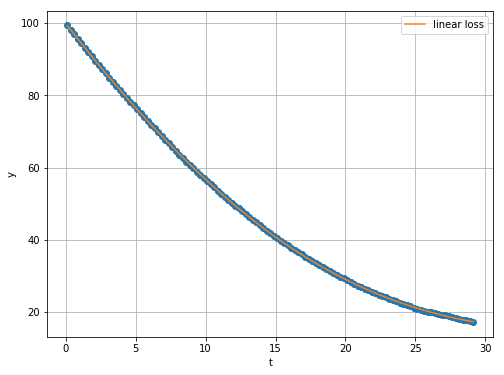

In [87]:
plt.plot(t_train, y_train, 'o')
plt.plot(t_test, y_lsq_c, label='linear loss')
plt.xlabel("t")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.show()

In [88]:
rt_sq_q = getEmpiricalFwrdRate(t_test,y_lsq_q)
rt_sq_c = getEmpiricalFwrdRate(t_test,y_lsq_c)
m = len(rt_sq_q)
t_test_1 = np.zeros(m)
for i in range(m):
    t_test_1[i] = t_test[i+1] 

In [89]:
def get_quadratic(x,beta):
    n = len(x)
    r = np.zeros(n)
    for i in range(n):
        r[i] = beta[0]+beta[1]*x[i]+beta[2]*x[i]*x[i]
    return r

In [90]:
def get_cubic(x,beta):
    n = len(x)
    r = np.zeros(n)
    for i in range(n):
        r[i] = beta[0]+beta[1]*x[i]+beta[2]*x[i]*x[i] + beta[3]*x[i]*x[i]*x[i]
    return r

In [91]:
rt_sq_q = get_quadratic(t_test,res_quad.x)
rt_sq_c = get_cubic(t_test,res_c.x)

t_test_1 = t_test


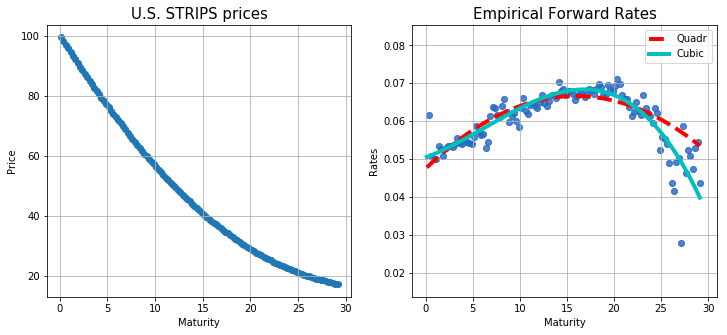

In [92]:
plt.figure(figsize=(12,5))
plt.subplot(1,2, 1)
plt.scatter(df['T'],df['price'])
plt.ylabel('Price')
plt.xlabel('Maturity')
plt.title('U.S. STRIPS prices', fontsize = 15)
plt.grid()

plt.subplot(1,2,2)
plt.scatter(mat,rt, alpha = 0.4, color = 'b')
plt.plot(t_test_1,rt_sq_q, linewidth = 4, linestyle = 'dashed', color = 'r', label ='Quadr')
plt.scatter(mat,rt, alpha = 0.6)
plt.plot(t_test_1,rt_sq_c, linewidth = 4, color = 'c',label ='Cubic')
plt.ylabel('Rates')
plt.xlabel('Maturity')
plt.title('Empirical Forward Rates', fontsize = 15)
plt.grid()
plt.legend(loc='best');
plt.savefig("USStrips_graph1")

In [93]:
percentiles = np.asarray([50])
knot = np.percentile(mat, percentiles)

In [94]:
knot

array([14.74795])

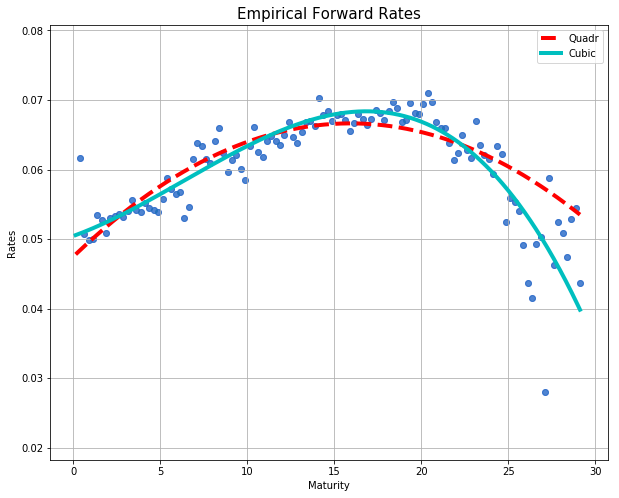

In [95]:
plt.figure(figsize=(10,8))
plt.scatter(mat,rt, alpha = 0.4, color = 'b')
plt.plot(t_test_1,rt_sq_q, linewidth = 4, linestyle = 'dashed', color = 'r', label ='Quadr')
plt.scatter(mat,rt, alpha = 0.6)
plt.plot(t_test_1,rt_sq_c, linewidth = 4, color = 'c',label ='Cubic')
plt.ylabel('Rates')
plt.xlabel('Maturity')
plt.title('Empirical Forward Rates', fontsize = 15)
plt.grid()
plt.legend(loc='best');
plt.savefig("USStrips_graph2")

Examples of Kernel Regression
===

In [96]:
def Epa(x):
    n = len(x)
    y = np.zeros(n)
    for i in range(n):
        if np.abs(x[i]) < 1:
            y[i] = 3*(1-x[i]**2)/4
        else:
            y[i]=0
    return y

In [97]:
def tri(x):
    n = len(x)
    y = np.zeros(n)
    for i in range(n):
        if np.abs(x[i]) < 1:
            z= np.abs(x[i])
            y[i] = (1-z**3)/3
        else:
            y[i]=0
    return y

In [98]:
def gaussian(x, sig):
    return np.exp(-np.power(x, 2.) / (2 * np.power(sig, 2.)))


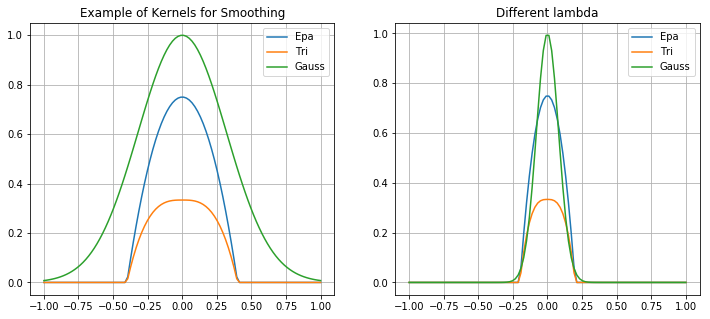

In [99]:
m = 100
x = np.linspace(-1,1,m)
x_0 =0
lamb = 0.4

x_t = np.zeros(m)

for i in range(m):
    x_t[i] = np.abs(x[i]-x_0)/lamb

plt.figure(figsize=(12,5))
plt.subplot(1,2, 1)
y_epa = Epa(x_t)
y_tri = tri(x_t)
y_gauss = gaussian(x_t,2*lamb)
plt.plot(x,y_epa, label = 'Epa')
plt.plot(x,y_tri, label = 'Tri')
plt.plot(x,y_gauss, label = 'Gauss')
plt.grid()
plt.legend(loc='best');
plt.title("Example of Kernels for Smoothing")
plt.savefig("KernelExamples")

lamb = 0.2
x_t = np.zeros(m)
for i in range(m):
    x_t[i] = np.abs(x[i]-x_0)/lamb
plt.subplot(1,2, 2)
y_epa = Epa(x_t)
y_tri = tri(x_t)
y_gauss = gaussian(x_t,2*lamb)
plt.plot(x,y_epa, label = 'Epa')
plt.plot(x,y_tri, label = 'Tri')
plt.plot(x,y_gauss, label = 'Gauss')
plt.grid()
plt.legend(loc='best');
plt.title("Different lambda")
plt.savefig("KernelExamples")

In [100]:
df = pd.read_csv('WeekInt.csv')
df['aaa_diff']= df['aaa'].diff().dropna()
df['cm10_diff']= df['cm10'].diff().dropna()
# Filter data:
q_low = df['aaa_diff'].quantile(0.01)
q_high = df['aaa_diff'].quantile(0.99)
df_filtered = df[(df['aaa_diff'] < q_high ) & (df['aaa_diff'] > q_low)]

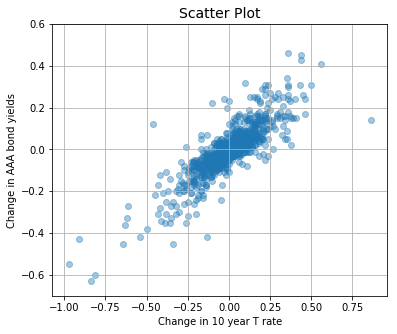

In [101]:
plt.figure(figsize=(6,5))
X = df_filtered['cm10_diff']
y = df_filtered['aaa_diff']
plt.scatter(X,y,marker = 'o', alpha = 0.4)
plt.title('Scatter Plot', size = 14)
plt.xlabel('Change in 10 year T rate')
plt.ylabel('Change in AAA bond yields')
plt.ylim(-0.7,0.6)
plt.grid()
#plt.savefig("Scatter")

In [102]:
X = df_filtered['cm10_diff']
y = df_filtered['aaa_diff']
Xnew = sm.add_constant(X)
model_1 = sm.OLS(y, Xnew).fit()
y_fitted = model_1.predict(Xnew)

In [103]:
type(X)

pandas.core.series.Series

In [104]:
X = df_filtered['cm10_diff'].values
model = sm.nonparametric.KernelReg(endog=[y], exog=X, var_type='c', bw = 'AIC')#,ckertype = 'tricube')

In [105]:
test= model.fit()

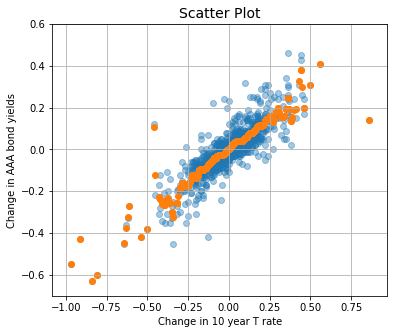

In [106]:
plt.figure(figsize=(6,5))
X = df_filtered['cm10_diff']
y = df_filtered['aaa_diff']
plt.scatter(X,y,marker = 'o', alpha = 0.4)
plt.scatter(X,test[0])
plt.title('Scatter Plot', size = 14)
plt.xlabel('Change in 10 year T rate')
plt.ylabel('Change in AAA bond yields')
plt.ylim(-0.7,0.6)
plt.grid()



In [107]:
X = mat
y = rt
model = sm.nonparametric.KernelReg(endog=[y], exog=X, var_type='c', bw = 'AIC') #, ckertype = 'tricube')

In [108]:
test= model.fit()

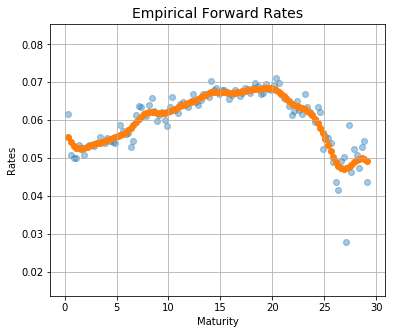

In [110]:
plt.figure(figsize=(6,5))
X = mat
y = rt
plt.scatter(X,y,marker = 'o', alpha = 0.4)
plt.scatter(X,test[0])

plt.ylabel('Rates')
plt.xlabel('Maturity')
plt.title('Empirical Forward Rates', fontsize = 14)
plt.grid()



In [111]:
df = pd.read_csv('Capm.csv')
df.head()

,rfood,rdur,rcon,rmrf,rf
0,-4.59,0.87,-6.84,-6.99,0.33
1,2.62,3.46,2.78,0.99,0.29
2,-1.67,-2.28,-0.48,-1.46,0.35
3,0.86,2.41,-2.02,-1.70,0.19
4,7.34,6.33,3.69,3.08,0.27


In [112]:
df['rf_diff'] = df['rf'].diff()
df['rf_1'] = df['rf'].shift(1)
df.head()

,rfood,rdur,rcon,rmrf,rf,rf_diff,rf_1
0,-4.59,0.87,-6.84,-6.99,0.33,NaN,NaN
1,2.62,3.46,2.78,0.99,0.29,-0.04,0.33
2,-1.67,-2.28,-0.48,-1.46,0.35,0.06,0.29
3,0.86,2.41,-2.02,-1.70,0.19,-0.16,0.35
4,7.34,6.33,3.69,3.08,0.27,0.08,0.19


In [113]:
df_new = df.dropna()
df_new.head()

,rfood,rdur,rcon,rmrf,rf,rf_diff,rf_1
1,2.62,3.46,2.78,0.99,0.29,-0.04,0.33
2,-1.67,-2.28,-0.48,-1.46,0.35,0.06,0.29
3,0.86,2.41,-2.02,-1.70,0.19,-0.16,0.35
4,7.34,6.33,3.69,3.08,0.27,0.08,0.19
5,4.99,-1.26,2.05,2.09,0.24,-0.03,0.27


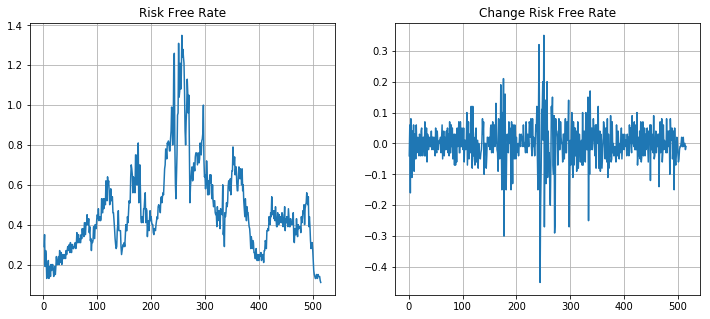

In [46]:
plt.figure(figsize=(12,5))
plt.subplot(1,2, 1)
plt.plot(df_new['rf'])
plt.title('Risk Free Rate')
plt.grid()
plt.subplot(1,2, 2)
plt.plot(df_new['rf_diff'])
plt.title('Change Risk Free Rate')
plt.grid()

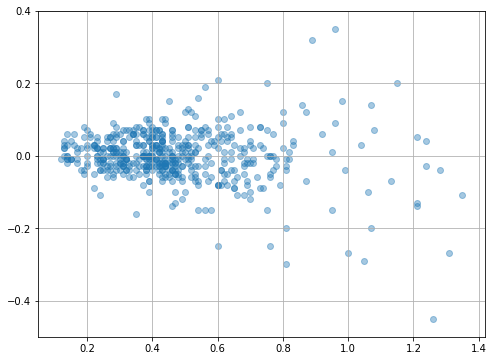

In [47]:
plt.scatter(df['rf_1'],df['rf_diff'], alpha = 0.4)
plt.grid()

In [48]:
X = df_new['rf_1'].values
y = df_new['rf_diff'].values

In [49]:
model = sm.nonparametric.KernelReg(endog=y, exog=[X], var_type='c', reg_type = 'll') 

In [50]:
test= model.fit()

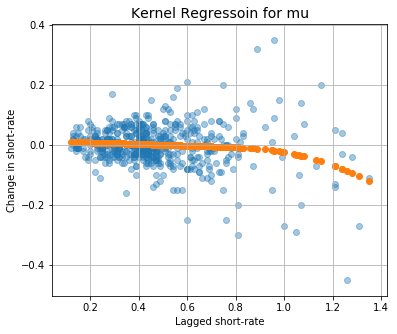

In [51]:
plt.figure(figsize=(6,5))
plt.scatter(df['rf_1'],df['rf_diff'], alpha = 0.4)
plt.scatter(X,test[0])
plt.title('Kernel Regressoin for mu', size = 14)
plt.xlabel('Lagged short-rate')nel
plt.ylabel('Change in short-rate')
plt.grid()

In [52]:
mu_hat = test[0]
res_sq = np.power(df_new['rf_diff'].values- mu_hat, 2)

In [53]:
model = sm.nonparametric.KernelReg(endog=res_sq, exog=[X], var_type='c', reg_type = 'lc') 

In [54]:
test2 = model.fit()
sigma_hat = test2[0]

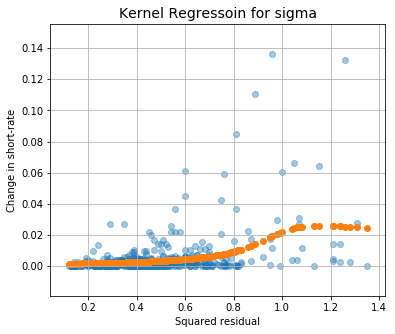

In [55]:
plt.figure(figsize=(6,5))
plt.scatter(df_new['rf_1'],res_sq, alpha = 0.4)
plt.scatter(df_new['rf_1'],sigma_hat)
plt.title('Kernel Regressoin for sigma', size = 14)
plt.xlabel('Squared residual')
plt.ylabel('Change in short-rate')
plt.grid()

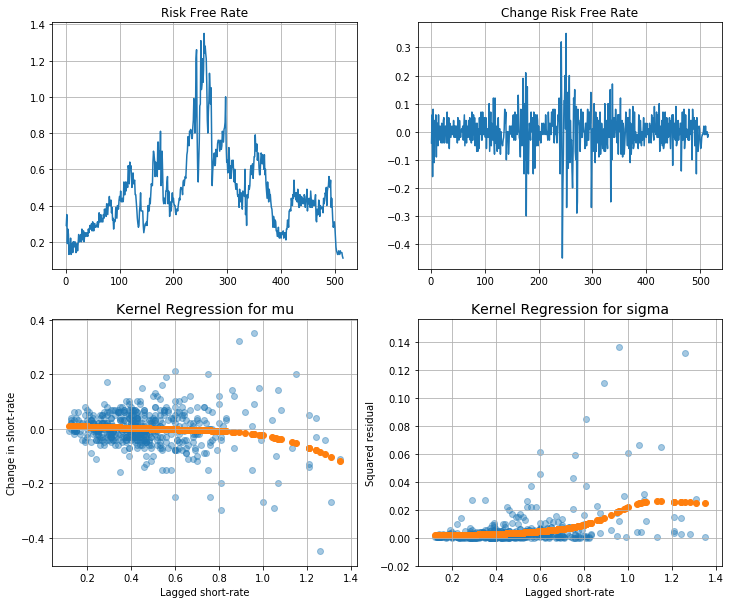

In [59]:
plt.figure(figsize=(12,10))
plt.subplot(2,2, 1)
plt.plot(df_new['rf'])
plt.title('Risk Free Rate')
plt.grid()
plt.subplot(2,2, 2)
plt.plot(df_new['rf_diff'])
plt.title('Change Risk Free Rate')
plt.grid()

plt.subplot(2,2, 3)
plt.scatter(df['rf_1'],df['rf_diff'], alpha = 0.4)
plt.scatter(X,test[0])
plt.title('Kernel Regression for mu', size = 14)
plt.xlabel('Lagged short-rate')
plt.ylabel('Change in short-rate')
plt.grid()
plt.subplot(2,2, 4)
plt.scatter(df_new['rf_1'],res_sq, alpha = 0.4)
plt.scatter(df_new['rf_1'],sigma_hat)
plt.title('Kernel Regression for sigma', size = 14)
plt.ylabel('Squared residual')
plt.xlabel('Lagged short-rate')
plt.grid()
plt.savefig("KernelLocalRegression")